In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df =pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
# Checking for missing or null values 
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Checking for outliers in each score column
outliers_math = detect_outliers(df, 'math score')
outliers_reading = detect_outliers(df, 'reading score')
outliers_writing = detect_outliers(df, 'writing score')

# Displaying the outliers
print("Outliers in Math Score:\n", outliers_math)
print("\nOutliers in Reading Score:\n", outliers_reading)
print("\nOutliers in Writing Score:\n", outliers_writing)

Outliers in Math Score:
      gender race/ethnicity parental level of education         lunch  \
17   female        group B            some high school  free/reduced   
59   female        group C            some high school  free/reduced   
145  female        group C                some college  free/reduced   
338  female        group B            some high school  free/reduced   
466  female        group D          associate's degree  free/reduced   
787  female        group B                some college      standard   
842  female        group B                 high school  free/reduced   
980  female        group B                 high school  free/reduced   

    test preparation course  math score  reading score  writing score  
17                     none          18             32             28  
59                     none           0             17             10  
145                    none          22             39             33  
338                    none          2

In [6]:
summary_stats = df.describe()

# Data types
data_types = df.dtypes

# Display summary statistics and data types
print("Summary Statistics:")
print(summary_stats)

print("\nData Types:")
print(data_types)

Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Data Types:
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


In [7]:
size=df.size
shape=df.shape
print(f"The size is '{size}' and the rows is '{shape[0]}' and the columns is '{shape[1]}' ")

The size is '8000' and the rows is '1000' and the columns is '8' 


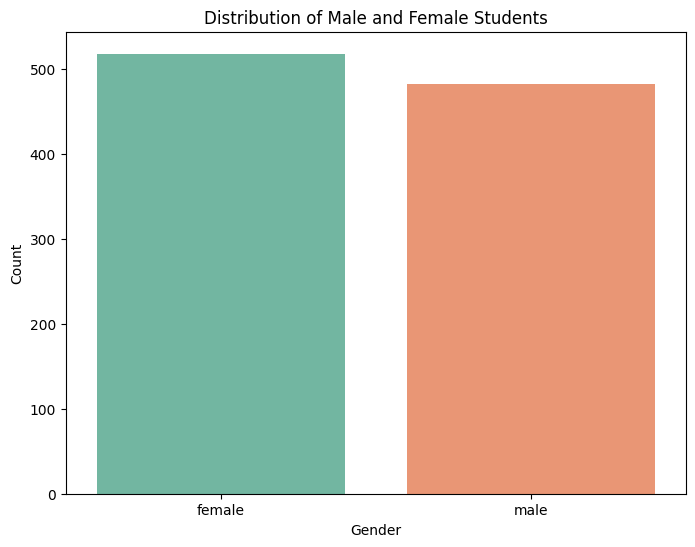

In [8]:
# Create a bar plot for the distribution of male and female students
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette='Set2')
plt.title('Distribution of Male and Female Students')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

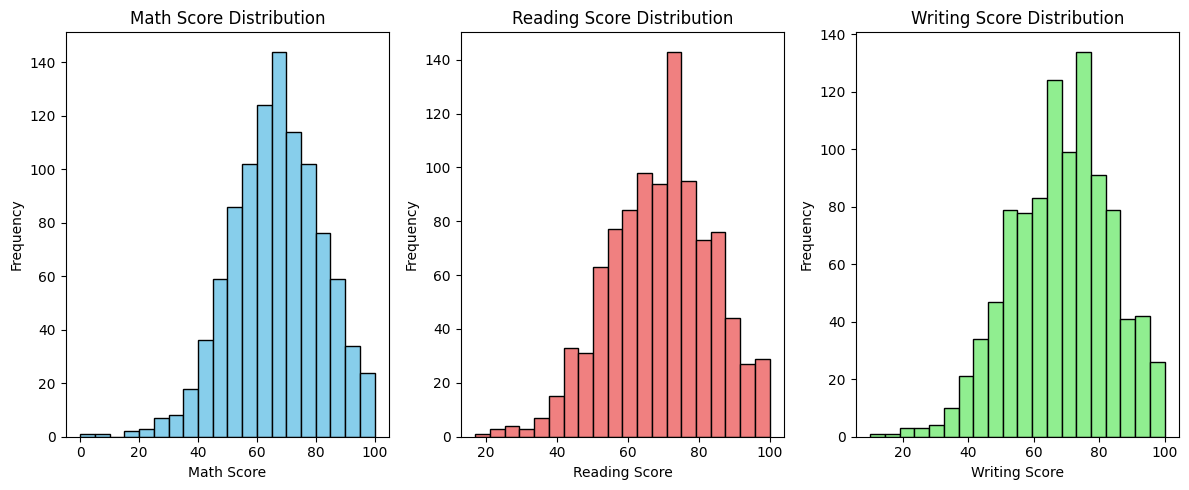

In [9]:
# Create histograms for math, reading, and writing scores
plt.figure(figsize=(12, 5))

# Math Score Histogram
plt.subplot(1, 3, 1)
plt.hist(df['math score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# Reading Score Histogram
plt.subplot(1, 3, 2)
plt.hist(df['reading score'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Reading Score Distribution')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')

# Writing Score Histogram
plt.subplot(1, 3, 3)
plt.hist(df['writing score'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Writing Score Distribution')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')

plt.tight_layout()

# Show the histograms
plt.show()

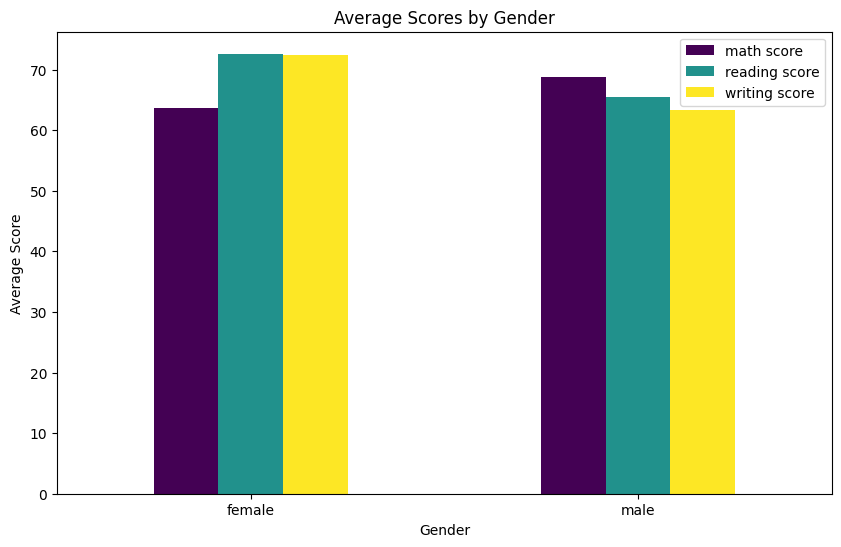

In [10]:
# Calculate the average scores for each gender
average_scores = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Create a bar plot for average scores
ax = average_scores.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)  # Avoid rotating x-axis labels

# Show the plot
plt.show()

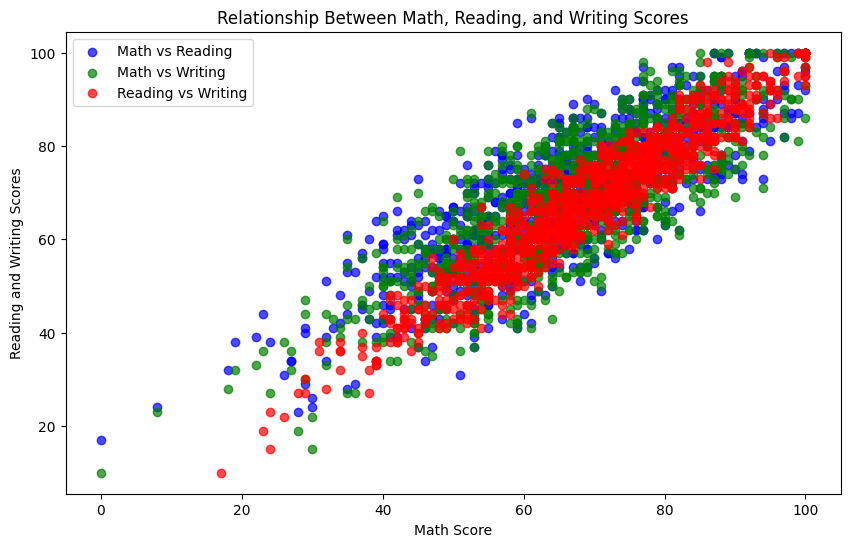

In [11]:
# Create a scatter plot to show the relationship between math, reading, and writing scores
plt.figure(figsize=(10, 6))
plt.scatter(df['math score'], df['reading score'], c='blue', label='Math vs Reading', alpha=0.7)
plt.scatter(df['math score'], df['writing score'], c='green', label='Math vs Writing', alpha=0.7)
plt.scatter(df['reading score'], df['writing score'], c='red', label='Reading vs Writing', alpha=0.7)

plt.title('Relationship Between Math, Reading, and Writing Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading and Writing Scores')
plt.legend()

# Show the plot
plt.show()

In [12]:
from statistics import mode

# Calculate mean, median, and mode for math scores
math_mean = df['math score'].mean()
math_median = df['math score'].median()
math_mode = mode(df['math score'])

# Calculate mean, median, and mode for reading scores
reading_mean = df['reading score'].mean()
reading_median = df['reading score'].median()
reading_mode = mode(df['reading score'])

# Calculate mean, median, and mode for writing scores
writing_mean = df['writing score'].mean()
writing_median = df['writing score'].median()
writing_mode = mode(df['writing score'])

# Display the results
print("Math Scores:")
print("Mean:", math_mean)
print("Median:", math_median)
print("Mode:", math_mode)

print("\nReading Scores:")
print("Mean:", reading_mean)
print("Median:", reading_median)
print("Mode:", reading_mode)

print("\nWriting Scores:")
print("Mean:", writing_mean)
print("Median:", writing_median)
print("Mode:", writing_mode)

Math Scores:
Mean: 66.089
Median: 66.0
Mode: 65

Reading Scores:
Mean: 69.169
Median: 70.0
Mode: 72

Writing Scores:
Mean: 68.054
Median: 69.0
Mode: 74


In [13]:
# Calculate the standard deviation for math scores
math_std = np.std(df['math score'], ddof=1)

# Calculate the standard deviation for reading scores
reading_std = np.std(df['reading score'], ddof=1)

# Calculate the standard deviation for writing scores
writing_std = np.std(df['writing score'], ddof=1)

# Display the results
print("Standard Deviation for Math Scores:", math_std)
print("Standard Deviation for Reading Scores:", reading_std)
print("Standard Deviation for Writing Scores:", writing_std)

Standard Deviation for Math Scores: 15.16308009600945
Standard Deviation for Reading Scores: 14.600191937252216
Standard Deviation for Writing Scores: 15.19565701086965


In [14]:
from scipy.stats import ttest_ind

# Separate data for male and female students
male_scores = df[df['gender'] == 'male']
female_scores = df[df['gender'] == 'female']

# Perform t-test for Math Scores
t_stat_math, p_value_math = ttest_ind(male_scores['math score'], female_scores['math score'])

# Perform t-test for Reading Scores
t_stat_reading, p_value_reading = ttest_ind(male_scores['reading score'], female_scores['reading score'])

# Perform t-test for Writing Scores
t_stat_writing, p_value_writing = ttest_ind(male_scores['writing score'], female_scores['writing score'])

# Display the results
print("Math Scores:")
print("t-statistic:", t_stat_math)
print("p-value:", p_value_math)

print("\nReading Scores:")
print("t-statistic:", t_stat_reading)
print("p-value:", p_value_reading)

print("\nWriting Scores:")
print("t-statistic:", t_stat_writing)
print("p-value:", p_value_writing)

Math Scores:
t-statistic: 5.383245869828983
p-value: 9.120185549328822e-08

Reading Scores:
t-statistic: -7.959308005187657
p-value: 4.680538743933289e-15

Writing Scores:
t-statistic: -9.979557910004507
p-value: 2.019877706867934e-22


In [15]:
df.to_csv('clean_data.csv')

# **Documentation:**

***Plot 1:***

Bar Plot - Distribution of Male and Female Students
Explanation and Interpretation:

This bar plot shows the distribution of male and female students in the dataset.
On the x-axis, we have the "Gender" categories, which are "Male" and "Female."
On the y-axis, we have the count of students in each gender category.
From the plot, it is evident that there are roughly an equal number of male and female students in the dataset.


***Plot 2:*** 

Histograms - Distribution of Math, Reading, and Writing Scores
Explanation and Interpretation:

These histograms display the distributions of scores in math, reading, and writing.
Each histogram represents one subject:

Math Score Histogram (Left): It shows the distribution of math scores. The scores are approximately normally distributed with a peak around 65-70.
Reading Score Histogram (Middle): It displays the distribution of reading scores. The scores are also approximately normally distributed with a peak around 70-75.
Writing Score Histogram (Right): It presents the distribution of writing scores. Similar to math and reading, the scores are approximately normally distributed with a peak around 70-75.

These histograms provide insights into the performance of students in each subject, including the central tendency and spread of scores.



***Plot 3:*** 

Bar Plot - Average Scores by Gender
Explanation and Interpretation:

This bar plot illustrates the average scores in math, reading, and writing for each gender (male and female).
On the x-axis, we have the "Gender" categories.
On the y-axis, we have the average score values.
Observations:
On average, female students tend to score slightly higher in reading and writing compared to male students.
Male students have a slightly higher average math score compared to female students.
These differences in average scores between genders can be further tested for statistical significance.



***Plot 4:*** 

Scatter Plot - Relationship Between Math, Reading, and Writing Scores
Explanation and Interpretation:

This scatter plot visualizes the relationships between math, reading, and writing scores for each student.
Each point represents a student's scores in math, reading, and writing.
Observations:
There is a positive correlation between math and reading scores, as well as between math and writing scores. Students who score higher in math tend to score higher in reading and writing as well.
The correlation between reading and writing scores is also positive. Students with higher reading scores tend to have higher writing scores.
Overall, there is a strong positive relationship between all three subjects, suggesting that students who perform well in one subject tend to perform well in the others.
Conclusion:
Based on the analysis and observations from the plots:

The dataset contains an approximately equal number of male and female students.
The scores in math, reading, and writing subjects are approximately normally distributed.
Female students tend to have slightly higher average scores in reading and writing, while male students have a slightly higher average score in math.
There is a positive correlation between math, reading, and writing scores, indicating that performance in one subject is positively associated with performance in the others.
To test whether the differences in average scores between genders are statistically significant, you can perform t-tests or ANOVA, as mentioned earlier in the conversation. This will provide further insights into whether these differences are likely due to random chance or if they are statistically significant.